In [1]:
## Import packages

import itertools
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score, train_test_split, LeaveOneOut, ShuffleSplit, RepeatedKFold, cross_validate

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder
from sklearn.preprocessing import scale, StandardScaler, MinMaxScaler, PowerTransformer

from sklearn.linear_model import Lasso, ElasticNet, LassoCV, ElasticNetCV
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import LinearRegression,  LogisticRegression
from sklearn.svm import SVR, LinearSVR
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor, StackingRegressor, ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor

# Importing the Packages:
#import optuna  # import by `$ pip install optuna`
#import pandas as pd
#from sklearn import linear_model
#from sklearn import ensemble
#from sklearn import datasets
#from sklearn import model_selection

In [2]:
# Load data
dataPath = './peru_for_ml_course.csv'
peru = pd.read_csv(dataPath, sep =",")
peru.head()

,lnpercapitaconsumption,d_fuel_other,d_fuel_wood,d_fuel_coal,d_fuel_kerosene,d_fuel_gas,d_fuel_electric,d_fuel_none,d_water_other,d_water_river,...,d_lux_4,d_lux_5,training,percapitaconsumption,poor,h_hhsize,id_for_matlab,hhid,lncaphat_OLS,percapitahat_OLS
0,NaN,0,1,0,0,0,0,0,0,1,...,0,0,0,NaN,0,1,1,233710511,5.246471,284.4243
1,NaN,0,0,0,0,1,0,0,0,0,...,0,0,0,NaN,0,3,2,295508011,6.129468,522.8840
2,NaN,0,0,0,0,1,0,0,0,0,...,0,0,0,NaN,0,4,3,257600211,6.665577,878.4961
3,NaN,0,0,0,0,1,0,0,0,0,...,0,0,0,NaN,1,9,4,198104311,6.088295,567.4705
4,NaN,0,1,0,0,0,0,0,0,1,...,0,0,0,NaN,1,8,5,24805311,5.008170,115.4929


In [3]:
## Prepare training data
peruTraining = peru.copy(deep=True)
peruTraining.dropna(axis='index', inplace=True)
peruTraining.drop(['id_for_matlab', 'poor', 'hhid', 'training', 'percapitaconsumption', 'lncaphat_OLS', 'percapitahat_OLS'], axis='columns', inplace=True)
peruTraining.describe()

,lnpercapitaconsumption,d_fuel_other,d_fuel_wood,d_fuel_coal,d_fuel_kerosene,d_fuel_gas,d_fuel_electric,d_fuel_none,d_water_other,d_water_river,...,d_crowd_2to4,d_crowd_4to6,d_crowd_6plus,d_lux_0,d_lux_1,d_lux_2,d_lux_3,d_lux_4,d_lux_5,h_hhsize
count,22674.000000,22674.000000,22674.000000,22674.000000,22674.000000,22674.000000,22674.000000,22674.000000,22674.000000,22674.000000,...,22674.000000,22674.000000,22674.000000,22674.000000,22674.000000,22674.000000,22674.000000,22674.000000,22674.000000,22674.000000
mean,5.849424,0.106730,0.312605,0.026021,0.004234,0.512878,0.007674,0.029858,0.039958,0.212622,...,0.202258,0.046705,0.019185,0.543706,0.193790,0.114184,0.068052,0.043839,0.036429,4.021081
std,0.745882,0.308777,0.463565,0.159201,0.064932,0.499845,0.087266,0.170199,0.195864,0.409172,...,0.401693,0.211012,0.137178,0.498097,0.395275,0.318041,0.251840,0.204741,0.187360,2.085648
min,2.110213,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,5.335076,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,5.870931,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,6.354526,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
max,8.858051,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,18.000000


In [88]:
# Processes the data using the box-cox 
#scaling and normalizing
# The power transform finds the optimal scaling factor to stabilize variance and
# mimimize skewness through maximum likelihood estimation.

# From the sci-kit learn manual pages
# Power transforms are a family of parametric, monotonic transformations that are applied 
# to make data more Gaussian-like. 
# This is useful for modeling issues related to heteroscedasticity (non-constant variance), 
# or other situations where normality is desired.

# By default, zero-mean, unit-variance normalization is applied to the transformed data.
#  The optimal parameter for stabilizing variance and minimizing skewness is estimated through maximum likelihood.
# Box-Cox requires input data to be strictly positive, while Yeo-Johnson supports both positive or negative data.


preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', PowerTransformer(method='box-cox'), ['h_hhsize'])], remainder='passthrough')

SyntaxError: invalid syntax (<ipython-input-88-c1bbee16d5d4>, line 9)

# Winsorizing

(array([5.775e+03, 8.483e+03, 5.850e+03, 1.259e+03, 9.870e+02, 2.460e+02,
        3.100e+01, 3.300e+01, 9.000e+00, 1.000e+00]),
 array([ 1. ,  2.7,  4.4,  6.1,  7.8,  9.5, 11.2, 12.9, 14.6, 16.3, 18. ]),
 <BarContainer object of 10 artists>)

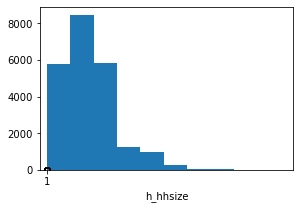

In [5]:
# h_hhid is the only non-dummy variable which coudl be winsorized
peruTraining['h_hhsize'].value_counts(dropna=False).sort_index(ascending = True)
fig = plt.figure(figsize=(10,3))
ax1 = fig.add_subplot(1,2,1)
ax1.boxplot(peruTraining['h_hhsize'])
ax1.set_xlabel('h_hhsize')
plt.hist(peruTraining['h_hhsize'])

In [83]:
from scipy.stats.mstats import winsorize

(array([2552., 3223., 3840.,    0., 4643., 3583.,    0., 2267., 1259.,
        1307.]),
 array([1. , 1.7, 2.4, 3.1, 3.8, 4.5, 5.2, 5.9, 6.6, 7.3, 8. ]),
 <BarContainer object of 10 artists>)

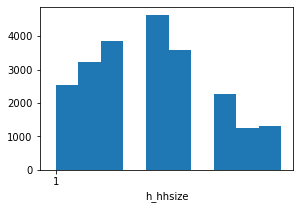

In [84]:
#winsorization only on the higher end since lower end wouldn't make sense (min. 1 person per houshold)
winsorize(a=peruTraining['h_hhsize'], limits=[0., 0.05], inplace=True)
peruTraining['h_hhsize'].value_counts(dropna=False).sort_index(ascending = True)
fig = plt.figure(figsize=(10,3))
ax1 = fig.add_subplot(1,2,1)
ax1.boxplot(peruTraining['h_hhsize'])
ax1.set_xlabel('h_hhsize')
plt.hist(peruTraining['h_hhsize'])

# Prepare training data and Helper function

In [85]:
X = peruTraining.drop('lnpercapitaconsumption', axis='columns')
y = peruTraining['lnpercapitaconsumption']
print(X.describe())
print(len(y))

       d_fuel_other   d_fuel_wood   d_fuel_coal  d_fuel_kerosene  \
count  22674.000000  22674.000000  22674.000000     22674.000000   
mean       0.106730      0.312605      0.026021         0.004234   
std        0.308777      0.463565      0.159201         0.064932   
min        0.000000      0.000000      0.000000         0.000000   
25%        0.000000      0.000000      0.000000         0.000000   
50%        0.000000      0.000000      0.000000         0.000000   
75%        0.000000      1.000000      0.000000         0.000000   
max        1.000000      1.000000      1.000000         1.000000   

         d_fuel_gas  d_fuel_electric   d_fuel_none  d_water_other  \
count  22674.000000     22674.000000  22674.000000   22674.000000   
mean       0.512878         0.007674      0.029858       0.039958   
std        0.499845         0.087266      0.170199       0.195864   
min        0.000000         0.000000      0.000000       0.000000   
25%        0.000000         0.000000      

In [86]:
scorers = ['neg_mean_squared_error', 'r2', 'max_error']

def print_best_scores(name, model):
  print("{name}: parameters:", model.best_params_)
  print("{name}: best score:", model.best_score_)

def print_all_metrics(name, y, predictions):
  print(f"{name} r2:", metrics.r2_score(y, predictions))
  print(f"{name} explained_variance_score:", metrics.explained_variance_score(y, predictions))
  print(f"{name} max_error:", metrics.max_error(y, predictions))
  print(f"{name} mean absolute error:", metrics.mean_absolute_error(y, predictions))
  print(f"{name} mean squared error:", metrics.mean_squared_error(y, predictions))

def print_model_metrics(name, model):
  predictions = model.predict(X)
  print_all_metrics(name, y, predictions)

def getRegressor(model):
  return model.named_steps['regressor']

def plotCoefs(title, pipe):
  coefs = pd.DataFrame(getRegressor(pipe).coef_, columns=['Coefficients'], index=X.columns)
  coefs.plot(kind='barh')
  plt.title(title)
  plt.axvline(x=0, color='.5')
  # plt.subplots_adjust(left=.3)

## Regression OLS

OLS r2: 0.6923709683362658
OLS explained_variance_score: 0.6923709727054502
OLS max_error: 2.993821423828125
OLS mean absolute error: 0.32056739038191456
OLS mean squared error: 0.17113878685635783


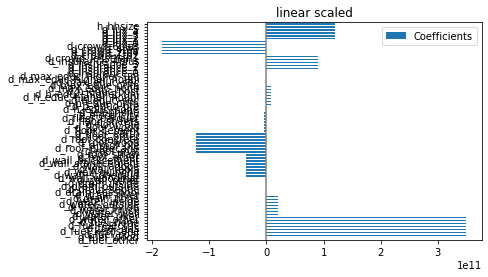

In [87]:
#Not winsorized
linear = LinearRegression()

linear = Pipeline([('preprocessor', preprocessor), ('regressor', linear)])
linear.fit(X, y)
print_model_metrics("OLS", linear)
plotCoefs('linear scaled', linear)

LinearRegression()

In [18]:
#Call the coefficient
coefs = pd.DataFrame(getRegressor(linear).coef_, columns=['Coefficients'], index=X.columns)
print(coefs)

                 Coefficients
d_fuel_other    -2.373621e-01
d_fuel_wood     -2.205278e+11
d_fuel_coal     -2.205278e+11
d_fuel_kerosene -2.205278e+11
d_fuel_gas      -2.205278e+11
...                       ...
d_lux_2         -2.656869e+10
d_lux_3         -2.656869e+10
d_lux_4         -2.656869e+10
d_lux_5         -2.656869e+10
h_hhsize        -2.656869e+10

[73 rows x 1 columns]


## Ridge Regression

In [19]:
#Not winsorized
def ridgeInvestigate(alphas):

# Find what sort of magnitude we should be using
  ridge = RidgeCV(alphas=alphas, cv=None, store_cv_values=True)
  ridgepipe = Pipeline([('preprocessor', preprocessor), ('regressor', ridge)])

  ridgepipe.fit(X, y)

# plot alphas
  fig = plt.figure()
  f1 = fig.add_subplot(1,2,1)
  f1.plot(ridge.alphas, ridge.cv_values_.mean(0))

  f1.set_xlabel("alpha")
  f1.set_xscale("log")
  f1.set_ylabel("mean squared error")
  f1.set_title("RidgeCV Alpha Error")

  f2 = fig.add_subplot(1,2,2)
  f2.plot(ridge.alphas, np.abs(ridge.cv_values_).max(0))
  f2.set_xlabel("alpha")
  f2.set_xscale("log")
  f2.set_ylabel("worstcase mean squared error")
  f2.set_title("RidgeCV Alpha Error")
  print();
  print("ridge alpha", ridge.alpha_)
  print("ridge best_score:", ridge.best_score_)
  print("ridge:", ridge)
  print()
  print_model_metrics("ridge", ridgepipe)
  plotCoefs('ridge scaled', ridgepipe)
  return ridgepipe


ridge alpha 3.5481338923357533
ridge best_score: -0.17204446379884245
ridge: RidgeCV(alphas=array([ 0.01      ,  0.01412538,  0.01995262,  0.02818383,  0.03981072,
        0.05623413,  0.07943282,  0.11220185,  0.15848932,  0.22387211,
        0.31622777,  0.44668359,  0.63095734,  0.89125094,  1.25892541,
        1.77827941,  2.51188643,  3.54813389,  5.01187234,  7.07945784,
       10.        ]),
        store_cv_values=True)

ridge r2: 0.692570349600421
ridge explained_variance_score: 0.692570349600421
ridge max_error: 2.9799113968707758
ridge mean absolute error: 0.3206058810210264
ridge mean squared error: 0.1710278679762871


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler',
                                                  PowerTransformer(method='box-cox'),
                                                  ['h_hhsize'])])),
                ('regressor',
                 RidgeCV(alphas=array([ 0.01      ,  0.01412538,  0.01995262,  0.02818383,  0.03981072,
        0.05623413,  0.07943282,  0.11220185,  0.15848932,  0.22387211,
        0.31622777,  0.44668359,  0.63095734,  0.89125094,  1.25892541,
        1.77827941,  2.51188643,  3.54813389,  5.01187234,  7.07945784,
       10.        ]),
                         store_cv_values=True))])

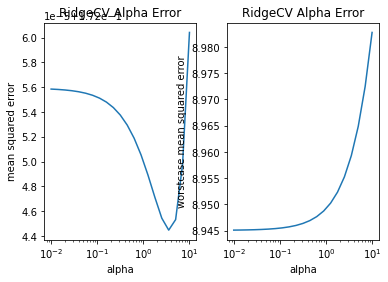

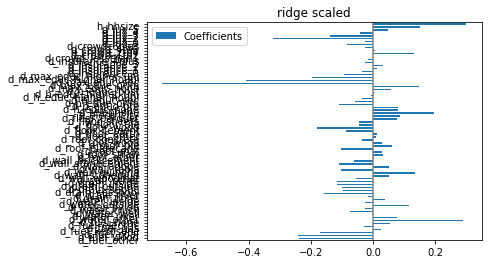

In [20]:
ridgeInvestigate(np.logspace(-2, 1, 21))


ridge alpha 3.7474631737480832
ridge best_score: -0.17204444083486456
ridge: RidgeCV(alphas=array([1.        , 1.01878093, 1.03791459, 1.05740759, 1.07726669,
       1.09749877, 1.11811082, 1.13910998, 1.16050353, 1.18229887,
       1.20450354, 1.22712524, 1.2501718 , 1.27365119, 1.29757154,
       1.32194115, 1.34676844, 1.372062  , 1.39783061, 1.42408317,
       1.45082878, 1.4780767 , 1.50583635, 1.53411737, 1.56292952,
       1.59228279, 1.62218735, 1.65265354, 1.68369191, 1.71531322,
       1.7475284 ,...
       3.67837977, 3.74746317, 3.81784403, 3.8895467 , 3.96259601,
       4.03701726, 4.11283621, 4.19007911, 4.2687727 , 4.34894423,
       4.43062146, 4.51383266, 4.59860665, 4.68497277, 4.77296092,
       4.86260158, 4.95392577, 5.04696512, 5.14175183, 5.23831872,
       5.33669923, 5.43692742, 5.53903799, 5.64306628, 5.74904833,
       5.85702082, 5.96702113, 6.07908735, 6.19325828, 6.30957344]),
        store_cv_values=True)

ridge r2: 0.6925689298544513
ridge explained_var

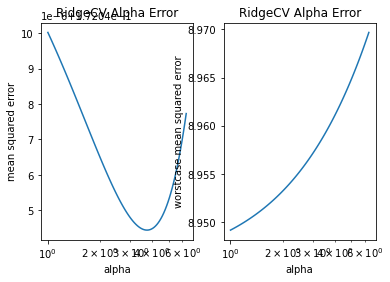

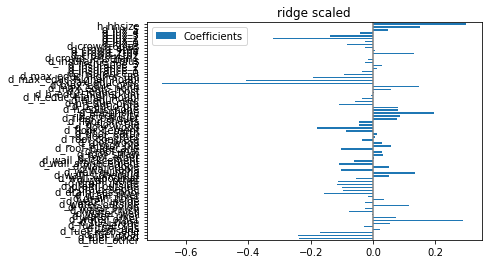

In [24]:
#Optimized & selected best predictor
ridgepipe = ridgeInvestigate(10**np.linspace(0,0.8, 100))

## Lasso Regression

In [21]:
#Not winsorized
def lassoInvestigate(alphas, cv=20):

  # Find what sort of magnitude we should be using
  lasso = LassoCV(alphas=alphas, cv=cv, max_iter=100000)
  lassopipe = Pipeline([('preprocessor', preprocessor), ('regressor', lasso)])

  lassopipe.fit(X, y)

  # plot alphas
  fig = plt.figure()
  f1 = fig.add_subplot(1,2,1)
  f1.plot(lasso.alphas_, np.mean(lasso.mse_path_, axis=1))
  f1.set_xlabel("alpha")
  f1.set_xscale("log")
  f1.set_ylabel("mean squared error")
  f1.set_title("LassoCV Alpha Error")

  f2 = fig.add_subplot(1,2,2)
  f2.plot(lasso.alphas_, np.abs(lasso.mse_path_).max(axis=1))
  f2.set_xlabel("alpha")
  f2.set_xscale("log")
  f2.set_ylabel("worstcase mean squared error")
  f2.set_title("LassoCV Alpha Error")
  print();
  print("lasso alpha", lasso.alpha_)
  print("lasso best_score:", lasso.score(X,y))
  print("lasso:", lasso)
  print()
  print_model_metrics("lasso", lassopipe)
  plotCoefs('lasso scaled', lassopipe)
  return lassopipe


lasso alpha 0.0001
lasso best_score: -3.835871812253651
lasso: LassoCV(alphas=array([1.00000000e-04, 1.58489319e-04, 2.51188643e-04, 3.98107171e-04,
       6.30957344e-04, 1.00000000e-03, 1.58489319e-03, 2.51188643e-03,
       3.98107171e-03, 6.30957344e-03, 1.00000000e-02, 1.58489319e-02,
       2.51188643e-02, 3.98107171e-02, 6.30957344e-02, 1.00000000e-01,
       1.58489319e-01, 2.51188643e-01, 3.98107171e-01, 6.30957344e-01,
       1.00000000e+00]),
        cv=20, max_iter=100000)

lasso r2: 0.6924589139400028
lasso explained_variance_score: 0.6924589139400028
lasso max_error: 2.9775416830337367
lasso mean absolute error: 0.32070026046467964
lasso mean squared error: 0.1710898613571893


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler',
                                                  PowerTransformer(method='box-cox'),
                                                  ['h_hhsize'])])),
                ('regressor',
                 LassoCV(alphas=array([1.00000000e-04, 1.58489319e-04, 2.51188643e-04, 3.98107171e-04,
       6.30957344e-04, 1.00000000e-03, 1.58489319e-03, 2.51188643e-03,
       3.98107171e-03, 6.30957344e-03, 1.00000000e-02, 1.58489319e-02,
       2.51188643e-02, 3.98107171e-02, 6.30957344e-02, 1.00000000e-01,
       1.58489319e-01, 2.51188643e-01, 3.98107171e-01, 6.30957344e-01,
       1.00000000e+00]),
                         cv=20, max_iter=100000))])

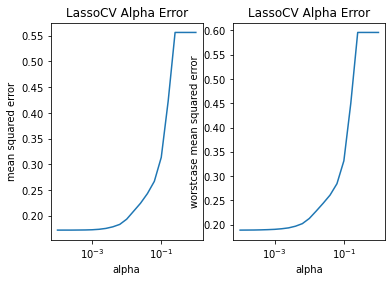

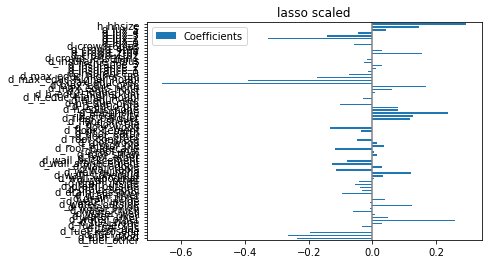

In [25]:
lassoInvestigate(np.logspace(-4, 0, 21))


lasso alpha 0.001
lasso best_score: -3.6094119102737885
lasso: LassoCV(alphas=array([0.001     , 0.00107227, 0.00114976, 0.00123285, 0.00132194,
       0.00141747, 0.00151991, 0.00162975, 0.00174753, 0.00187382,
       0.00200923, 0.00215443, 0.00231013, 0.00247708, 0.00265609,
       0.00284804, 0.00305386, 0.00327455, 0.00351119, 0.00376494,
       0.00403702, 0.00432876, 0.00464159, 0.00497702, 0.0053367 ,
       0.00572237, 0.00613591, 0.00657933, 0.0070548 , 0.00756463,
       0.008...
       0.09326033, 0.1       , 0.10722672, 0.1149757 , 0.12328467,
       0.13219411, 0.14174742, 0.15199111, 0.16297508, 0.17475284,
       0.18738174, 0.2009233 , 0.21544347, 0.23101297, 0.24770764,
       0.26560878, 0.28480359, 0.30538555, 0.32745492, 0.35111917,
       0.37649358, 0.40370173, 0.43287613, 0.46415888, 0.49770236,
       0.53366992, 0.57223677, 0.61359073, 0.65793322, 0.70548023,
       0.75646333, 0.81113083, 0.869749  , 0.93260335, 1.        ]),
        cv=20, max_iter=100000)


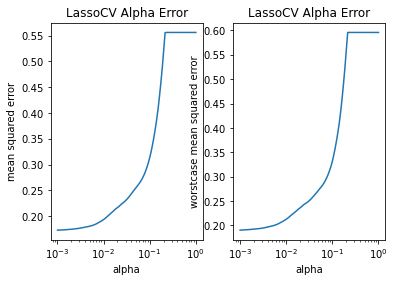

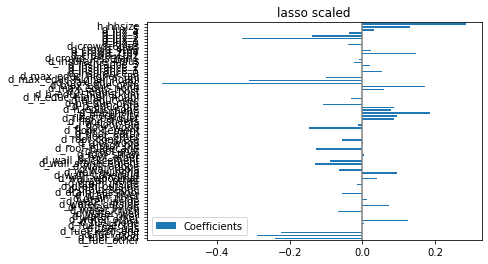

In [26]:
#Lasso is just bad
lassopipe = lassoInvestigate(10**np.linspace(-3,0, 100))

## Averaging Lasso and Ridge 

In [27]:
#not winsorized
avg_predictions = (lassopipe.predict(X) + ridgepipe.predict(X)) / 2.0
print_all_metrics('averaged', y, avg_predictions)

averaged r2: 0.692087355463936
averaged explained_variance_score: 0.692087355463936
averaged max_error: 2.985532222613653
averaged mean absolute error: 0.3208902170527662
averaged mean squared error: 0.1712965650824404


# ElasticNet

In [31]:
#Not winsorized
def elasticInvestigate(l1_ratios, cv=20):
  cv=20
# Find what sort of magnitude we should be using
  elastic = ElasticNetCV(l1_ratio=l1_ratios, cv=cv, eps=1e-8, max_iter=100000, n_jobs=-1)
  elasticpipe = Pipeline([('preprocessor', preprocessor), ('regressor', elastic)])
  elasticpipe.fit(X, y)

# plot alphas
  fig = plt.figure()
  f1 = fig.add_subplot(1,2,1)
  for (a,m) in zip(elastic.alphas_, np.mean(elastic.mse_path_, axis=2)):   
     f1.scatter(a, m)
  f1.set_xlabel("alpha")
  f1.set_xscale("log")
  f1.set_title("ElasticCV MSE")
  print();
  print("elastic alpha", elastic.alpha_)
  print("elastic best_score:", elastic.score(X,y))
  print("elastic:", elastic)
  print()
  print_model_metrics("elastic", elasticpipe)
  plotCoefs('elastic scaled', elasticpipe)
  return elasticpipe


elastic alpha 0.00016134831616804098
elastic best_score: -3.656561247279897
elastic: ElasticNetCV(cv=20, eps=1e-08,
             l1_ratio=array([1.00000000e-04, 1.58489319e-04, 2.51188643e-04, 3.98107171e-04,
       6.30957344e-04, 1.00000000e-03, 1.58489319e-03, 2.51188643e-03,
       3.98107171e-03, 6.30957344e-03, 1.00000000e-02, 1.58489319e-02,
       2.51188643e-02, 3.98107171e-02, 6.30957344e-02, 1.00000000e-01,
       1.58489319e-01, 2.51188643e-01, 3.98107171e-01, 6.30957344e-01,
       1.00000000e+00]),
             max_iter=100000, n_jobs=-1)

elastic r2: 0.6925648615158588
elastic explained_variance_score: 0.6925648615158588
elastic max_error: 2.979912892947649
elastic mean absolute error: 0.3206119915858923
elastic mean squared error: 0.17103092108258547


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler',
                                                  PowerTransformer(method='box-cox'),
                                                  ['h_hhsize'])])),
                ('regressor',
                 ElasticNetCV(cv=20, eps=1e-08,
                              l1_ratio=array([1.00000000e-04, 1.58489319e-04, 2.51188643e-04, 3.98107171e-04,
       6.30957344e-04, 1.00000000e-03, 1.58489319e-03, 2.51188643e-03,
       3.98107171e-03, 6.30957344e-03, 1.00000000e-02, 1.58489319e-02,
       2.51188643e-02, 3.98107171e-02, 6.30957344e-02, 1.00000000e-01,
       1.58489319e-01, 2.51188643e-01, 3.98107171e-01, 6.30957344e-01,
       1.00000000e+00]),
                              max_iter=100000, n_jobs=-1))])

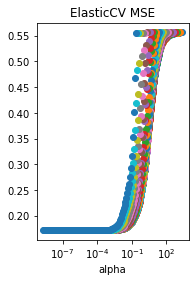

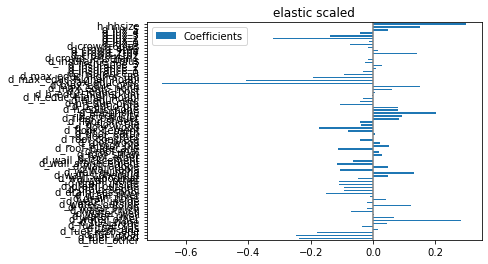

In [30]:
elasticInvestigate(np.logspace(-4, 0, 21))


elastic alpha 0.0001787347025533538
elastic best_score: -3.594815225712394
elastic: ElasticNetCV(cv=20, eps=1e-08,
             l1_ratio=array([1.00000000e-05, 1.29154967e-05, 1.66810054e-05, 2.15443469e-05,
       2.78255940e-05, 3.59381366e-05, 4.64158883e-05, 5.99484250e-05,
       7.74263683e-05, 1.00000000e-04]),
             max_iter=100000, n_jobs=-1)

elastic r2: 0.6925666471283842
elastic explained_variance_score: 0.6925666471283842
elastic max_error: 2.9802414947303415
elastic mean absolute error: 0.32061020171155
elastic mean squared error: 0.17102992771872852


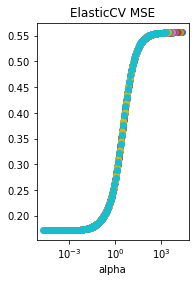

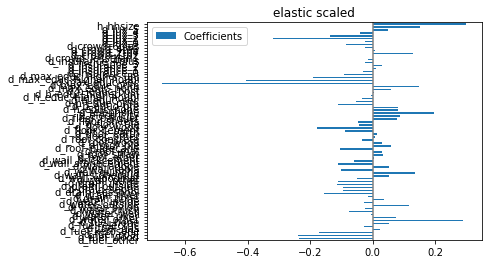

In [32]:
#Optimized & safe best predictor
elasticpipe = elasticInvestigate(10**np.linspace(-5,-4, 10))

## KNN-Regressor

### Without Winsorizing

In [35]:
## Get non-winsorized data Prepare training data
peruTraining = peru.copy(deep=True)
peruTraining.dropna(axis='index', inplace=True)
peruTraining.drop(['id_for_matlab', 'poor', 'hhid', 'training', 'percapitaconsumption', 'lncaphat_OLS', 'percapitahat_OLS'], axis='columns', inplace=True)
peruTraining.head()
y = peruTraining['lnpercapitaconsumption']
X = peruTraining.drop('lnpercapitaconsumption', axis='columns')


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=43)

In [36]:
# Compare winsorizing vs not
from sklearn.neighbors import KNeighborsRegressor
def knnrInvestigate(nn):
  # Find what sort of magnitude we should be using
  knnr = KNeighborsRegressor(n_neighbors=nn, n_jobs=-1)
  knnrpipe = Pipeline([('preprocessor', preprocessor), ('regressor', knnr)])

  results = cross_validate(knnrpipe, X, y, cv=20, n_jobs=2, pre_dispatch=4, verbose=True, scoring=scorers)
  print(results)
  return results, knnrpipe

knnrs = []
results = []
for i in range(2, 5):
    print(i)
    result, knnr = knnrInvestigate(i)
    results.append(result)
    knnrs.append(knnr)
print( [np.mean(knn['test_r2']) for knn in results]) # (last output line) we see higher k is better for r2 score

2


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:   15.6s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


{'fit_time': array([0.36925149, 0.36400533, 0.37385058, 0.4146347 , 0.45624399,
       0.47303915, 0.49602985, 0.56529498, 0.49066639, 0.50580597,
       0.41342831, 0.420784  , 0.42533803, 0.466681  , 0.48470569,
       0.53477311, 0.56511378, 0.56399822, 0.65081286, 0.75280285]), 'score_time': array([1.02997923, 1.10204101, 0.97645926, 1.08510947, 0.93891907,
       1.02056813, 0.96820855, 0.89026356, 1.06868577, 0.90331316,
       1.00163007, 1.0768404 , 0.9787004 , 1.07929564, 0.86898828,
       0.94400072, 0.8518734 , 0.85923028, 0.80553508, 0.5983026 ]), 'test_neg_mean_squared_error': array([-0.24626103, -0.24619739, -0.26380844, -0.24465381, -0.26614709,
       -0.26312053, -0.2548787 , -0.27152596, -0.25762746, -0.2540661 ,
       -0.24686333, -0.24829553, -0.24836511, -0.2855989 , -0.23916289,
       -0.25658207, -0.25459018, -0.26168665, -0.25359507, -0.24841802]), 'test_r2': array([0.55419172, 0.57315065, 0.50265751, 0.55252959, 0.52268953,
       0.52349049, 0.52992942, 0.4

[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:   15.5s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


{'fit_time': array([0.38655567, 0.38351655, 0.40122032, 0.35448885, 0.39344811,
       0.43493247, 0.48196149, 0.77655292, 0.66640329, 0.70406961,
       0.63477969, 0.59501648, 0.55130839, 0.67515564, 0.74914265,
       0.5718019 , 0.51179457, 0.57243967, 0.57551813, 0.69512868]), 'score_time': array([1.26725292, 1.25991344, 1.19775033, 1.13210726, 0.97996998,
       1.17575669, 0.92288971, 0.76562834, 0.80590057, 0.8680079 ,
       0.88624477, 0.9138155 , 0.81933594, 0.80483794, 1.02646184,
       0.97330952, 0.87386966, 0.85910559, 0.98443747, 0.79231   ]), 'test_neg_mean_squared_error': array([-0.21964123, -0.21988517, -0.23380809, -0.21798654, -0.24305129,
       -0.22797079, -0.2105142 , -0.24293699, -0.2246446 , -0.22969752,
       -0.22130136, -0.22660771, -0.22698476, -0.25825132, -0.21168735,
       -0.22627466, -0.22485576, -0.22109046, -0.22216006, -0.21903588]), 'test_r2': array([0.60238174, 0.61876994, 0.5592154 , 0.60130388, 0.56410972,
       0.58714645, 0.61175048, 0.5

[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:   16.2s finished


### With winsorizing

In [37]:
#With winsorizing
peruTraining['h_hhsize'].value_counts(dropna=False).sort_index(ascending = True)
from scipy.stats.mstats import winsorize
winsorize(a=peruTraining['h_hhsize'], limits=[0., 0.05], inplace=True)
peruTraining['h_hhsize'].value_counts(dropna=False).sort_index(ascending = True)
y = peruTraining['lnpercapitaconsumption']
X = peruTraining.drop('lnpercapitaconsumption', axis='columns')

In [38]:
#With winsorized + higher cross validation - the more you add the "better" MSE
from sklearn.neighbors import KNeighborsRegressor
def knnrInvestigate(nn):
  # Find what sort of magnitude we should be using
  knnr = KNeighborsRegressor(n_neighbors=nn, n_jobs=-1)
  knnrpipe = Pipeline([('preprocessor', preprocessor), ('regressor', knnr)])

  results = cross_validate(knnrpipe, X, y, cv=20, n_jobs=2, pre_dispatch=4, verbose=True, scoring=scorers)
  print(results)
  return results, knnrpipe

knnrs = []
results = []
for i in range(2, 5):
    print(i)
    result, knnr = knnrInvestigate(i)
    results.append(result)
    knnrs.append(knnr)
    

# Here we see winzorized data is worse for knns.
    
# Again we see higher k is better for r2 score
print( [np.mean(knn['test_r2']) for knn in results])





[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


2


[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:   13.8s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


{'fit_time': array([0.38153052, 0.41417193, 0.36280227, 0.36523438, 0.40212417,
       0.455899  , 0.51199341, 0.637573  , 0.55441666, 0.5852623 ,
       0.51625538, 0.57633853, 0.55668521, 0.54796314, 0.58912158,
       0.74198031, 0.61722398, 0.64312935, 0.59972191, 0.62667942]), 'score_time': array([1.07669258, 1.03675556, 0.9796412 , 1.13973451, 0.74011278,
       0.86492944, 0.7368114 , 0.73193288, 0.78269935, 0.66152787,
       0.67525053, 0.68084264, 0.69805431, 0.8004303 , 0.74505377,
       0.7385025 , 0.75183535, 0.71595383, 0.78688407, 0.72483778]), 'test_neg_mean_squared_error': array([-0.24841874, -0.24865423, -0.26452915, -0.24596208, -0.26310145,
       -0.26492469, -0.25763424, -0.27165529, -0.25619145, -0.25687739,
       -0.24580341, -0.25201861, -0.25091577, -0.29035525, -0.2393582 ,
       -0.25317597, -0.25041817, -0.26372107, -0.25335014, -0.25017791]), 'test_r2': array([0.55028559, 0.56889105, 0.50129879, 0.55013678, 0.52815159,
       0.52022318, 0.52484739, 0.4

[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:   15.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


{'fit_time': array([0.44975019, 0.45082045, 0.35879898, 0.55308652, 0.62511015,
       0.7146616 , 0.58768153, 0.70009661, 0.69380307, 0.62141776,
       0.58496237, 0.60610843, 0.80603313, 0.64336324, 0.64288235,
       0.60633206, 0.70468926, 0.68196368, 0.81793237, 0.68751717]), 'score_time': array([1.15211511, 1.24963641, 0.73060966, 1.00499439, 0.81770706,
       0.82092237, 0.8192451 , 0.82637525, 0.63416338, 0.85132194,
       0.88415742, 0.81122875, 0.72248793, 0.89767742, 0.80568171,
       0.82161546, 0.84864068, 0.80845308, 0.78780532, 0.70733547]), 'test_neg_mean_squared_error': array([-0.21690276, -0.22238255, -0.2346267 , -0.21628766, -0.24130205,
       -0.22825568, -0.2115411 , -0.24013181, -0.22626687, -0.22967442,
       -0.22285513, -0.22814972, -0.22642067, -0.25849197, -0.21232063,
       -0.22637267, -0.22584735, -0.22133782, -0.22442582, -0.22121588]), 'test_r2': array([0.60733922, 0.61444007, 0.55767213, 0.60441112, 0.56724682,
       0.58663052, 0.60985657, 0.5

[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:   15.4s finished


In [39]:
# Higher k for lower variance, higher bias
#Give us the r^2 for each k
for i in range(5, 15):
    print(i)
    result, knnr = knnrInvestigate(i)
    results.append(result)
    knnrs.append(knnr)
print( [np.mean(knn['test_r2']) for knn in results])



[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


5


[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:   15.9s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


{'fit_time': array([0.42552543, 0.45537043, 0.37248445, 0.41123509, 0.37233567,
       0.41449308, 0.40498805, 0.44277167, 0.35471535, 0.42041492,
       0.38059282, 0.51016879, 0.66739774, 0.6126287 , 0.55639005,
       0.64910817, 0.68374348, 0.7979486 , 0.60244298, 0.7299881 ]), 'score_time': array([1.36616278, 1.38538861, 1.2134335 , 1.20990968, 1.12878275,
       1.16930985, 1.26824141, 1.14326334, 1.13049388, 1.14664102,
       0.92802906, 1.15283155, 0.91310239, 0.97456121, 0.77435946,
       0.78768611, 0.77463651, 0.74527264, 0.82991838, 0.66566825]), 'test_neg_mean_squared_error': array([-0.19128302, -0.20227184, -0.21518303, -0.19563802, -0.21096326,
       -0.20233244, -0.19216758, -0.22022736, -0.20603433, -0.21493757,
       -0.19638731, -0.20363943, -0.19763382, -0.23232088, -0.1894147 ,
       -0.20165097, -0.21099952, -0.20289012, -0.21067854, -0.20665418]), 'test_r2': array([0.65371884, 0.6493074 , 0.59432812, 0.6421792 , 0.62165667,
       0.63357732, 0.64558699, 0.5

[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:   15.9s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


{'fit_time': array([0.43638825, 0.43429923, 0.41257787, 0.53860688, 0.61288095,
       0.63860846, 0.66740274, 0.62325478, 0.71092153, 0.58595586,
       0.53002143, 0.72449446, 0.6469202 , 0.63807344, 0.63340211,
       0.6669426 , 0.73322701, 0.65415287, 0.65726948, 0.61534548]), 'score_time': array([1.23805737, 1.38749313, 0.84438825, 1.08964133, 0.79849577,
       0.99501443, 0.87131119, 0.80243325, 0.92693329, 0.86832309,
       0.86585402, 0.93926644, 0.87624669, 0.91932464, 0.80907369,
       0.94284439, 0.87700748, 0.92421293, 0.92220545, 0.81202435]), 'test_neg_mean_squared_error': array([-0.18603745, -0.19480811, -0.20947583, -0.1923501 , -0.20516909,
       -0.198613  , -0.18641359, -0.21906008, -0.19713272, -0.20747402,
       -0.18988143, -0.1995182 , -0.19058061, -0.22775526, -0.18186109,
       -0.20058175, -0.2077388 , -0.19560425, -0.20427376, -0.19488411]), 'test_r2': array([0.66321494, 0.66224778, 0.60508756, 0.64819278, 0.63204799,
       0.6403132 , 0.65619902, 0.5

[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:   17.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


{'fit_time': array([0.42661619, 0.40400457, 0.42330456, 0.44958878, 0.45295501,
       0.49426031, 0.54955459, 0.47727418, 0.44413233, 0.5941112 ,
       0.60585666, 0.63266468, 0.59305692, 0.73866773, 0.68780351,
       0.66332483, 0.7022655 , 0.65749812, 0.6574986 , 0.54169488]), 'score_time': array([1.41818857, 1.28363967, 1.22397709, 1.28479767, 1.2014761 ,
       1.26723719, 1.24136829, 1.30785489, 0.8095839 , 0.90973949,
       1.05079865, 1.03452563, 1.09281254, 1.03044009, 0.98637891,
       1.09349608, 1.0661304 , 0.89669466, 1.30977082, 1.18075204]), 'test_neg_mean_squared_error': array([-0.1851698 , -0.19349068, -0.20805055, -0.18817443, -0.20244256,
       -0.19440607, -0.18459096, -0.21149924, -0.19299626, -0.20205547,
       -0.18676912, -0.19619927, -0.1882287 , -0.22270247, -0.17614418,
       -0.1941798 , -0.20319174, -0.19442036, -0.19774634, -0.19063637]), 'test_r2': array([0.66478565, 0.6645319 , 0.60777457, 0.65583005, 0.63693778,
       0.64793193, 0.6595605 , 0.6

[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:   17.8s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


{'fit_time': array([0.47968125, 0.44735765, 0.37562966, 0.45182061, 0.45260119,
       0.54238248, 0.59849477, 0.43505836, 0.43802166, 0.49300122,
       0.49678636, 0.56261802, 0.69573522, 0.50310111, 0.42169476,
       0.61264968, 0.60812569, 0.69266653, 0.61725426, 0.84250998]), 'score_time': array([1.46086454, 1.37530947, 1.33889747, 1.35951304, 1.18617558,
       1.26006961, 1.26006079, 1.29896545, 1.29287815, 1.30383778,
       1.10935807, 1.17303038, 1.30004334, 1.31688023, 0.94942546,
       1.19294262, 1.04295897, 0.96325779, 0.90318847, 0.77035952]), 'test_neg_mean_squared_error': array([-0.18447263, -0.19264082, -0.2036254 , -0.18499619, -0.20326225,
       -0.1916598 , -0.18110425, -0.21199418, -0.19090785, -0.19889235,
       -0.18332249, -0.194585  , -0.18315999, -0.21754547, -0.17558059,
       -0.19173373, -0.2006955 , -0.19021322, -0.19583194, -0.18860816]), 'test_r2': array([0.66604774, 0.66600535, 0.61611704, 0.66164304, 0.63546773,
       0.6529054 , 0.66599099, 0.6

[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:   18.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


{'fit_time': array([0.47788191, 0.43995428, 0.42480588, 0.47237897, 0.41481376,
       0.63653159, 0.66544867, 0.77058125, 0.84654856, 0.76045847,
       0.78988194, 0.88223672, 0.67934036, 0.64374876, 0.58620501,
       0.6591773 , 0.80809569, 0.7706759 , 0.62996888, 0.69156504]), 'score_time': array([1.44739056, 1.31933284, 1.32997537, 1.42518592, 1.0666523 ,
       1.13262796, 0.85279512, 0.97995877, 0.89323378, 0.99703455,
       0.87674451, 1.2363584 , 1.14555597, 1.0598948 , 1.25204134,
       1.04105544, 0.95452857, 1.10375619, 1.0667398 , 0.87745881]), 'test_neg_mean_squared_error': array([-0.18119076, -0.18968194, -0.20217273, -0.18442043, -0.20143937,
       -0.18950002, -0.1764877 , -0.20722276, -0.19155181, -0.19506735,
       -0.17921625, -0.19418589, -0.18222519, -0.21475441, -0.17449069,
       -0.18753361, -0.19871424, -0.18768229, -0.19215097, -0.18563128]), 'test_r2': array([0.67198893, 0.67113537, 0.61885567, 0.66269609, 0.6387369 ,
       0.65681675, 0.67450525, 0.6

[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:   18.7s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


{'fit_time': array([0.44233656, 0.42801476, 0.3657825 , 0.43227482, 0.50378609,
       0.47137666, 0.48179388, 0.47585487, 0.48424888, 0.4525969 ,
       0.46305656, 0.4721961 , 0.52208281, 0.52792978, 0.59308696,
       0.49905753, 0.48386121, 0.41925621, 0.44685841, 0.45270681]), 'score_time': array([1.48753285, 1.3951633 , 1.24713373, 1.34806848, 1.29096627,
       1.34732413, 1.29400849, 1.2851491 , 1.35971165, 1.37476873,
       1.25549412, 1.36850429, 1.37481618, 1.43995261, 1.4457283 ,
       1.29926538, 1.50435352, 1.51871157, 1.5317812 , 1.45598245]), 'test_neg_mean_squared_error': array([-0.18179399, -0.18700342, -0.20244906, -0.1835998 , -0.19615716,
       -0.18521318, -0.17601706, -0.20635992, -0.18991478, -0.19350074,
       -0.17648765, -0.19304249, -0.1803506 , -0.21013433, -0.17206187,
       -0.18596021, -0.19576982, -0.18737906, -0.18862253, -0.18456642]), 'test_r2': array([0.6708969 , 0.6757793 , 0.61833472, 0.66419702, 0.64821007,
       0.66458018, 0.67537326, 0.6

[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:   18.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


{'fit_time': array([0.40719366, 0.42268825, 0.40113211, 0.41629314, 0.47751212,
       0.57108521, 0.48500133, 0.50773311, 0.50448895, 0.61569405,
       0.73298526, 0.66495085, 0.61153698, 0.86393881, 0.64296603,
       0.68401527, 0.61761165, 0.66255116, 0.548841  , 0.44398832]), 'score_time': array([1.43473387, 1.5152812 , 1.3545804 , 1.44467282, 1.58000898,
       1.53756499, 1.32646704, 1.37848377, 0.9835968 , 1.22502851,
       1.07575464, 1.07068181, 0.96492052, 1.07927465, 0.87401676,
       1.01179147, 0.97172189, 1.19148374, 1.186095  , 0.73213267]), 'test_neg_mean_squared_error': array([-0.18082074, -0.18639775, -0.19865261, -0.18363963, -0.19204741,
       -0.1848503 , -0.17654241, -0.20567286, -0.18802433, -0.19185224,
       -0.17333434, -0.18988019, -0.17972248, -0.20837624, -0.17122168,
       -0.18885191, -0.19427373, -0.18344639, -0.18866399, -0.18318294]), 'test_r2': array([0.67265878, 0.67682938, 0.62549195, 0.66412418, 0.65558052,
       0.66523736, 0.67440435, 0.6

[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:   17.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


{'fit_time': array([0.43293715, 0.45403886, 0.37079501, 0.44448996, 0.50386763,
       0.4624052 , 0.4185257 , 0.4287703 , 0.52214193, 0.4566288 ,
       0.46483994, 0.69260359, 0.58976793, 0.63415265, 0.62822866,
       0.65071607, 0.60331225, 0.66082144, 0.52136374, 0.8128159 ]), 'score_time': array([1.43112612, 1.52351546, 1.31610847, 1.37476301, 1.33475018,
       1.30023599, 1.0667305 , 1.22082114, 1.09741926, 1.14705777,
       0.94549203, 1.09264851, 0.86039734, 0.85908914, 0.99269414,
       0.9017055 , 1.19406343, 0.90607309, 0.99678731, 0.90573502]), 'test_neg_mean_squared_error': array([-0.17697486, -0.18567352, -0.20012668, -0.18242417, -0.19043706,
       -0.18289812, -0.1754335 , -0.20303309, -0.18837512, -0.19096915,
       -0.17125075, -0.1903392 , -0.17950134, -0.206344  , -0.17151535,
       -0.18791592, -0.1896113 , -0.18313371, -0.19014662, -0.1825225 ]), 'test_r2': array([0.67962102, 0.67808503, 0.62271298, 0.66634724, 0.65846853,
       0.66877274, 0.67644951, 0.6

[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:   17.5s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


{'fit_time': array([0.42250347, 0.42905641, 0.37780547, 0.4773829 , 0.43876028,
       0.43917131, 0.38621497, 0.45700765, 0.48372555, 0.5236721 ,
       0.61597466, 0.52912807, 0.48181486, 0.62034082, 0.59240222,
       0.61288881, 0.61155891, 0.72767878, 0.77690434, 0.62820888]), 'score_time': array([1.4387393 , 1.51074672, 1.3154819 , 1.35817361, 1.41385913,
       1.36314702, 1.17786574, 1.21428609, 1.23014927, 1.29857278,
       1.35000849, 1.34824586, 1.02068901, 1.11531973, 0.89084673,
       1.00505543, 0.86252022, 0.84787416, 1.0991776 , 0.9458077 ]), 'test_neg_mean_squared_error': array([-0.17851243, -0.18561204, -0.20121271, -0.1822632 , -0.18911053,
       -0.18458653, -0.17434539, -0.20261444, -0.18775709, -0.19075797,
       -0.1715033 , -0.18965597, -0.17783688, -0.20422235, -0.17171142,
       -0.18681998, -0.18942918, -0.1806199 , -0.18697602, -0.18408338]), 'test_r2': array([0.67683754, 0.67819164, 0.62066554, 0.66664166, 0.66084755,
       0.66571504, 0.67845631, 0.6

[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:   17.5s finished



knnr all r2: 0.7321807387737242
knnr all explained_variance_score: 0.7326993267717364
knnr all max_error: 2.5496880000000006
knnr all mean absolute error: 0.30029339149466344
knnr all mean squared error: 0.14899199602569294


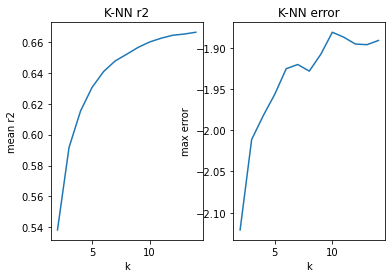

In [40]:
# Having selected the best k, fit and compare on all data for comparison to other methods
# Here we can see how bias and variance (as represented by r2 and max error) can be traded off
fig = plt.figure()
f1 = fig.add_subplot(1,2,1)
f1.plot(range(2,15), [np.mean(knn['test_r2']) for knn in results])
f1.set_xlabel("k")
f1.set_ylabel("mean r2")
f1.set_title("K-NN r2")
f2 = fig.add_subplot(1,2,2)
f2.plot(range(2,15), [np.mean(knn['test_max_error']) for knn in results])
f2.set_xlabel("k")
f2.set_ylabel("max error")
f2.set_title("K-NN error")
# We choose 7 as it gives a nice trade off of max error and the bias (approximated by r^2)
knnrpipe = knnrs[6] 
knnrpipe.fit(X,y)  
print();
print_all_metrics("knnr all", y, knnrpipe.predict(X))

# even with using the whole training set we still get a large max error that is why we do not choose it 
#(NOT DUE TO OVERFITTING!)

# Neural Networks

In [41]:
## Get non-winsorized data Prepare training data since NNs we want to be trained with greater data samples
peruTraining = peru.copy(deep=True)
peruTraining.dropna(axis='index', inplace=True)
peruTraining.drop(['id_for_matlab', 'poor', 'hhid', 'training', 'percapitaconsumption', 'lncaphat_OLS', 'percapitahat_OLS'], axis='columns', inplace=True)
peruTraining.head()
y = peruTraining['lnpercapitaconsumption']
X = peruTraining.drop('lnpercapitaconsumption', axis='columns')


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=43, train_size=0.8)

In [42]:
# logistic sigmoid function, returns f(x) = 1 / (1 + exp(-x)).
# alpha = L2 penalty (regularization term) parameter
# Tol = Tolerance for the optimization. When the loss or score is not improving by at least tol
mlplogistic= MLPRegressor(max_iter=50000,  activation='logistic', tol=1e-6)
mlplogisticpipe = Pipeline([('preprocessor', preprocessor), ('regressor', mlplogistic)])
mlplogisticpipe.fit(X_train, y_train)
## Using default tolerance
print_all_metrics("mlplogistic", y_test, mlplogisticpipe.predict(X_test))

mlplogistic r2: 0.5709082284233956
mlplogistic explained_variance_score: 0.5727545089826864
mlplogistic max_error: 2.132605226582373
mlplogistic mean absolute error: 0.3746274538290009
mlplogistic mean squared error: 0.23437965623487594


In [43]:
# Here due to training times, we go to a single train / test, no CV - even with less data, it performs better that is why we choose it
# Bad Bias-Variance Trade off?? Quite high variance of MSE for different runs
alpha=1e-2
from sklearn.neural_network import MLPRegressor
mlp= MLPRegressor(max_iter=50000, activation='logistic', alpha=alpha, tol=1e-6)
mlppipe = Pipeline([('preprocessor', preprocessor), ('regressor', mlp)])
mlppipe.fit(X_train, y_train)

##
print_all_metrics("mlp", y_test, mlppipe.predict(X_test))

mlp r2: 0.7017000369510464
mlp explained_variance_score: 0.7021750378760669
mlp max_error: 2.1043992510018796
mlp mean absolute error: 0.3127527649812896
mlp mean squared error: 0.16293820442512993


In [44]:
#alpha=1e-2
mlptanh= MLPRegressor(max_iter=50000, activation='tanh', alpha=alpha, tol=1e-6)
mlptanhpipe = Pipeline([('preprocessor', preprocessor), ('regressor', mlptanh)])
mlptanhpipe.fit(X_train, y_train)
##
print_all_metrics("mlptanh", y_test, mlptanhpipe.predict(X_test))

mlptanh r2: 0.6804122441382706
mlptanh explained_variance_score: 0.6940370817259585
mlptanh max_error: 2.2808812903799396
mlptanh mean absolute error: 0.3250533310813521
mlptanh mean squared error: 0.17456607960699397


# Random Forest

In [51]:
#With winsorizing as RF are sensitive to outliers
peruTraining['h_hhsize'].value_counts(dropna=False).sort_index(ascending = True)
from scipy.stats.mstats import winsorize
winsorize(a=peruTraining['h_hhsize'], limits=[0., 0.05], inplace=True)
peruTraining['h_hhsize'].value_counts(dropna=False).sort_index(ascending = True)
y = peruTraining['lnpercapitaconsumption']
X = peruTraining.drop('lnpercapitaconsumption', axis='columns')

In [52]:
#With winsorizing
rrfr = RandomForestRegressor(criterion="mse", random_state=44)
rrfrpipe = Pipeline([('preprocessor', preprocessor), ('regressor', rrfr)])
rrfrpipe.fit(X_train, y_train)
print_all_metrics("rrfr", y_test, rrfrpipe.predict(X_test))

rrfr r2: 0.6528106748225835
rrfr explained_variance_score: 0.6530854472534519
rrfr max_error: 2.157331329999997
rrfr mean absolute error: 0.3387776076503909
rrfr mean squared error: 0.1896426826935179


In [53]:
extr = ExtraTreesRegressor(criterion="mse", random_state=44)
extrpipe = Pipeline([('preprocessor', preprocessor), ('regressor', extr)])
extrpipe.fit(X_train, y_train)
print_all_metrics("extr", y_test, extrpipe.predict(X_test))

extr r2: 0.5417373380121913
extr explained_variance_score: 0.5419227462901574
extr max_error: 2.6740565700000074
extr mean absolute error: 0.38276324685726365
extr mean squared error: 0.25031345809157907


# Kernel Ridge

In [59]:
# with winsoirzing
kridgepipe = None
def kridgeInvestigate(alpha, cv=2):

  # Find what sort of magnitude we should be using
  kridge = KernelRidge(alpha=alpha, kernel='poly', degree=2, kernel_params={'interaction_only': True})
  kridgepipe = Pipeline([('preprocessor', preprocessor), ('regressor', kridge)])
  return cross_validate(kridgepipe, X, y, scoring=scorers, cv=cv, n_jobs=2, pre_dispatch=4, verbose=True)

kridges = [kridgeInvestigate(0.1),
           kridgeInvestigate(0.1),
           kridgeInvestigate(0.25),
           kridgeInvestigate(0.5)]



[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:   11.9s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:   12.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:   10.7s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:   10.7s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:   10.8s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:   10.8s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:   10.8s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:   10.8s finished


In [60]:
kridges

[{'fit_time': array([10.05922341, 10.10813189]),
  'score_time': array([0.97238588, 0.95875812]),
  'test_neg_mean_squared_error': array([-0.16528215, -0.16244818]),
  'test_r2': array([0.70361634, 0.70723588]),
  'test_max_error': array([-2.73959979, -2.00233467])},
 {'fit_time': array([9.95388365, 9.71328306]),
  'score_time': array([0.72763753, 0.78241086]),
  'test_neg_mean_squared_error': array([-0.16528215, -0.16244818]),
  'test_r2': array([0.70361634, 0.70723588]),
  'test_max_error': array([-2.73959979, -2.00233467])},
 {'fit_time': array([9.82847691, 9.87150598]),
  'score_time': array([0.96470857, 0.91196728]),
  'test_neg_mean_squared_error': array([-0.16496047, -0.16228652]),
  'test_r2': array([0.70419318, 0.70752721]),
  'test_max_error': array([-2.80929109, -1.9994108 ])},
 {'fit_time': array([ 9.81595898, 10.04114223]),
  'score_time': array([0.81706548, 0.70110893]),
  'test_neg_mean_squared_error': array([-0.1655257 , -0.16287303]),
  'test_r2': array([0.70317961, 0.

In [61]:
#Kernel Poly_3
def kridgeInvestigate(alpha, cv=2):

  # Find what sort of magnitude we should be using
  kridge = KernelRidge(alpha=alpha, kernel='poly', degree=3, kernel_params={'interaction_only': True})
  kridgepipe = Pipeline([('preprocessor', preprocessor), ('regressor', kridge)])
  return cross_validate(kridgepipe, X, y, scoring=scorers, cv=cv, n_jobs=2, pre_dispatch=4, verbose=True)

alphas = np.logspace(-4, 4, 40)
kridges = [kridgeInvestigate(a) for a in alphas ]
print(kridges)



[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:   16.3s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:   16.3s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:   17.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:   17.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:   17.6s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:   17.6s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:   16.5s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:   16.5s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Don

[{'fit_time': array([12.58284736, 12.57299209]), 'score_time': array([3.69745517, 3.71845102]), 'test_neg_mean_squared_error': array([-0.28159198, -0.28760195]), 'test_r2': array([0.49504977, 0.48168373]), 'test_max_error': array([-2.89121076, -2.99694171])}, {'fit_time': array([13.34618449, 12.98988438]), 'score_time': array([3.6628871 , 3.72778511]), 'test_neg_mean_squared_error': array([-0.25751478, -0.26128432]), 'test_r2': array([0.53822496, 0.52911336]), 'test_max_error': array([-2.71001032, -2.91738   ])}, {'fit_time': array([13.93467426, 13.70573139]), 'score_time': array([3.6894021 , 3.61809278]), 'test_neg_mean_squared_error': array([-0.23839692, -0.24036732]), 'test_r2': array([0.57250708, 0.56680999]), 'test_max_error': array([-2.63603249, -2.84080763])}, {'fit_time': array([12.74853897, 12.75319219]), 'score_time': array([3.73135591, 3.743505  ]), 'test_neg_mean_squared_error': array([-0.22307724, -0.22385153]), 'test_r2': array([0.59997829, 0.59657475]), 'test_max_error':

[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:   16.1s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:   16.1s finished


In [62]:
#With winsorized data & optimized - not a real improvement for computational time
#Kernelt Poly_3
def kridgeInvestigate(alpha, cv=2):

  # Find what sort of magnitude we should be using
  kridge = KernelRidge(alpha=alpha, kernel='poly', degree=3, kernel_params={'interaction_only': True})
  kridgepipe = Pipeline([('preprocessor', preprocessor), ('regressor', kridge)])
  return cross_validate(kridgepipe, X, y, scoring=scorers, cv=cv, n_jobs=2, pre_dispatch=4, verbose=True)

alphas = np.linspace(0.25, 0.35, 40)
kridges = [kridgeInvestigate(a) for a in alphas ]
print(kridges)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:   16.1s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:   16.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:   16.3s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:   16.3s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:   16.4s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:   16.4s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:   16.2s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:   16.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Don

[{'fit_time': array([12.39812803, 12.48864126]), 'score_time': array([3.61917925, 3.59123516]), 'test_neg_mean_squared_error': array([-0.16538133, -0.16251826]), 'test_r2': array([0.7034385 , 0.70710957]), 'test_max_error': array([-2.73555823, -1.99784587])}, {'fit_time': array([12.56982327, 12.63720918]), 'score_time': array([3.60112262, 3.63596678]), 'test_neg_mean_squared_error': array([-0.16536861, -0.16250751]), 'test_r2': array([0.70346131, 0.70712895]), 'test_max_error': array([-2.73636183, -1.99765784])}, {'fit_time': array([12.60814309, 12.76853108]), 'score_time': array([3.6177752, 3.5667572]), 'test_neg_mean_squared_error': array([-0.16535616, -0.16249701]), 'test_r2': array([0.70348363, 0.70714787]), 'test_max_error': array([-2.73715691, -1.9974688 ])}, {'fit_time': array([12.64561844, 12.47361565]), 'score_time': array([3.57506061, 3.61725688]), 'test_neg_mean_squared_error': array([-0.16534398, -0.16248676]), 'test_r2': array([0.70350547, 0.70716634]), 'test_max_error': a

[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:   16.3s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:   16.3s finished


In [64]:
#With winsoirzed data - seems to be "best"
# We only look at the interaction terms, no 'power terms'
kridgepipes = []
def kridgeInvestigate(alpha, cv=2):

  # Find what sort of magnitude we should be using
  kridge = KernelRidge(alpha=alpha, kernel='poly', degree=2, kernel_params={'interaction_only': True})
  kridgepipe_ = Pipeline([('preprocessor', preprocessor), ('regressor', kridge)])
  kridgepipes.append(kridgepipe_)
  return cross_validate(kridgepipe_, X, y, scoring=scorers, cv=cv, n_jobs=2, pre_dispatch=4, verbose=True)

kridges = [kridgeInvestigate(0.065),
           kridgeInvestigate(0.07),
           kridgeInvestigate(0.075),
           kridgeInvestigate(0.08)]




[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:   11.7s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:   11.7s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:   10.6s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:   10.6s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:   10.7s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:   10.7s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:   10.6s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:   10.6s finished


In [65]:
# The optimal kernel seems to be 0.065
kridges

[{'fit_time': array([ 9.62606549, 10.0358932 ]),
  'score_time': array([0.90346599, 0.72003579]),
  'test_neg_mean_squared_error': array([-0.16584373, -0.16292288]),
  'test_r2': array([0.70260932, 0.70638037]),
  'test_max_error': array([-2.70563973, -2.00968681])},
 {'fit_time': array([9.69785261, 9.88360453]),
  'score_time': array([0.81076813, 0.73397827]),
  'test_neg_mean_squared_error': array([-0.16572933, -0.16282247]),
  'test_r2': array([0.70281446, 0.70656132]),
  'test_max_error': array([-2.71154995, -2.00873789])},
 {'fit_time': array([9.79209137, 9.66922927]),
  'score_time': array([0.86280823, 0.84408283]),
  'test_neg_mean_squared_error': array([-0.16562937, -0.16273602]),
  'test_r2': array([0.70299371, 0.70671712]),
  'test_max_error': array([-2.71702865, -2.00773243])},
 {'fit_time': array([9.54997587, 9.73812842]),
  'score_time': array([0.82961941, 0.85938883]),
  'test_neg_mean_squared_error': array([-0.16554165, -0.16266128]),
  'test_r2': array([0.70315102, 0.70

# Combining regressions

In [68]:
## Get non-winsorized data Prepare training data since NNs we want to be trained with greater data samples
peruTraining = peru.copy(deep=True)
peruTraining.dropna(axis='index', inplace=True)
peruTraining.drop(['id_for_matlab', 'poor', 'hhid', 'training', 'percapitaconsumption', 'lncaphat_OLS', 'percapitahat_OLS'], axis='columns', inplace=True)
peruTraining.head()
y = peruTraining['lnpercapitaconsumption']
X = peruTraining.drop('lnpercapitaconsumption', axis='columns')


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=43, train_size=0.8)

In [69]:
#Random Forest, Logistic NN, KNNR, Ridge, Lasso as inputs for NN
mlpcombine = MLPRegressor(hidden_layer_sizes=(5,), max_iter=1000, activation='relu')
stackedRegr = StackingRegressor(estimators=[('rrfr', rrfr),  ('krdige', getRegressor(kridgepipes[1])), ('mlplogr',getRegressor(mlppipe)), ('knnr', getRegressor(knnrpipe)), ('ridge', getRegressor(ridgepipe)), ('lasso', getRegressor(lassopipe))], final_estimator=mlpcombine, n_jobs=2, passthrough=False)
stackedpipe = Pipeline([('preprocessor', preprocessor), ('regressor', stackedRegr)])
stackedpipe.fit(X_train, y_train)
print_all_metrics("stacked", y_test, stackedpipe.predict(X_test))

stacked r2: 0.6748734011245243
stacked explained_variance_score: 0.6754674169833541
stacked max_error: 2.122143886670302
stacked mean absolute error: 0.3272683525843267
stacked mean squared error: 0.17759152126655056


In [70]:
# Adjusting NN to only "meaningful" input regressions
#Not overfitting
mlpcombine = MLPRegressor(hidden_layer_sizes=(3,), max_iter=1000, activation='logistic')
stackedRegr = StackingRegressor(estimators=[('mlplogr',getRegressor(mlppipe)), ('knnr', getRegressor(knnrpipe)), ('krdige', getRegressor(kridgepipes[1])), ('ridge', getRegressor(ridgepipe))], final_estimator=mlpcombine, n_jobs=2)
stackedpipe = Pipeline([('preprocessor', preprocessor), ('regressor', stackedRegr)])
stackedpipe.fit(X_train, y_train, )
print_all_metrics("stacked", y_test, stackedpipe.predict(X_test))

stacked r2: 0.6978208931445924
stacked explained_variance_score: 0.6978214256807085
stacked max_error: 2.1343640792070655
stacked mean absolute error: 0.31365134425876423
stacked mean squared error: 0.16505708074033343


In [71]:
# Stack all regressions instead of using a NN
# Passtrhough = False, only the predictions of estimators will be used as training data for final_estimator
#default 5-fold cross validation
# Final estimator: Ridge on the outputs of the other estimators
stackedRegr = StackingRegressor(estimators=[('rrfr', rrfr),  ('mlplogr',getRegressor(mlppipe)), ('knnr', getRegressor(knnrpipe)), ('krdige', getRegressor(kridgepipes[1])), ('ridge', getRegressor(ridgepipe)), ('lasso', getRegressor(lassopipe))], n_jobs=2, passthrough=True)
stackedpipe = Pipeline([('preprocessor', preprocessor), ('regressor', stackedRegr)])
stackedpipe.fit(X_train, y_train)
print_all_metrics("stacked", y_test, stackedpipe.predict(X_test))

stacked r2: 0.7031900286096736
stacked explained_variance_score: 0.7033722344612495
stacked max_error: 2.1570760652711964
stacked mean absolute error: 0.3115731226094416
stacked mean squared error: 0.1621243371923496


In [72]:
#Adjust stacking
stackedRegr = StackingRegressor(estimators=[('mlplogr',getRegressor(mlppipe)), ('knnr', getRegressor(knnrpipe)), ('ridge', getRegressor(ridgepipe)), ('krdige', getRegressor(kridgepipes[1]))], n_jobs=2, passthrough=False)
stackedpipe = Pipeline([('preprocessor', preprocessor), ('regressor', stackedRegr)])
stackedpipe.fit(X_train, y_train)
print_all_metrics("stacked", y_test, stackedpipe.predict(X_test))

stacked r2: 0.7024105541927872
stacked explained_variance_score: 0.7024138715922583
stacked max_error: 2.155626929744166
stacked mean absolute error: 0.3119531630528414
stacked mean squared error: 0.16255010379514984


# Output predictions 

The submission should be in a CSV file format, mimicking the format of the file peru_for_ml_course.csv, but should contain columns with variables named “id_for_matlab”, “hhid”, “training”, “lnpercapitaconsumption “, “groupprediction” in that order. The column “groupprediction” should contain group’s predictions. The other columns should be the same as with the original data file

In [73]:
outputCols = []
peruPredict = peru.copy(deep=True)

dontfittocolumns = ['lnpercapitaconsumption', 'id_for_matlab', 'poor', 'hhid', 'training', 'percapitaconsumption', 'lncaphat_OLS', 'percapitahat_OLS', *outputCols]
peruPredict = peruPredict.dropna(subset=peruPredict.columns.drop(dontfittocolumns, errors='ignore'), axis=0)
peruPredictX = peruPredict.drop(columns=dontfittocolumns, errors='ignore', inplace=False)

In [74]:
#With/Without winsorizing
winzorize = True

peruTraining = peru.copy(deep=True)
peruTraining.dropna(axis='index', inplace=True)
peruTraining.drop(dontfittocolumns[1:], inplace=True, axis='columns')

if (winzorize):
    peruTraining['h_hhsize'].value_counts(dropna=False).sort_index(ascending = True)
    winsorize(a=peruTraining['h_hhsize'], limits=[0., 0.05], inplace=True)
y = peruTraining['lnpercapitaconsumption']
X = peruTraining.drop('lnpercapitaconsumption', axis='columns')

In [75]:
estimator = mlplogisticpipe
outputCol = 'groupprediction'
outputCols.append(outputCol)

fittedEstimator = estimator.fit(X, y)
print_all_metrics("Final, train and tested", y, fittedEstimator.predict(X))

predictedY = fittedEstimator.predict(peruPredictX)

peruPredict[outputCol]  = predictedY

Final, train and tested r2: 0.8084573314546286
Final, train and tested explained_variance_score: 0.8092983819171045
Final, train and tested max_error: 1.8619512896755213
Final, train and tested mean absolute error: 0.25297334798314974
Final, train and tested mean squared error: 0.10655814813315856


In [76]:
estimator = stackedpipe
outputCol = 'groupprediction2'
outputCols.append(outputCol)

fittedEstimator = estimator.fit(X, y)
print_all_metrics("Final, train and tested", y, fittedEstimator.predict(X))

predictedY = fittedEstimator.predict(peruPredictX)
peruPredict[outputCol]  = predictedY

Final, train and tested r2: 0.7244209519462511
Final, train and tested explained_variance_score: 0.7245629556441129
Final, train and tested max_error: 2.5386300466565874
Final, train and tested mean absolute error: 0.3039543267346018
Final, train and tested mean squared error: 0.15330888541917936


In [79]:
#Write out CSV
finalOutputsCols = ['id_for_matlab', 'poor', 'h_hhsize', 'percapitaconsumption', 'hhid', 'training', 'lnpercapitaconsumption', *outputCols]
print(peruPredict.describe())
print(finalOutputsCols)
outputfile = './peru_for_ml_course_predictions_boxyan.csv'
peruOut = peruPredict.copy(deep=True)
peruOut.reindex()
peruOut.to_csv(path_or_buf=outputfile, columns=finalOutputsCols, header=True, index=False)



       lnpercapitaconsumption  d_fuel_other   d_fuel_wood   d_fuel_coal  \
count            22674.000000  45378.000000  45378.000000  45378.000000   
mean                 5.849424      0.105910      0.312332      0.025056   
std                  0.745882      0.307726      0.463450      0.156298   
min                  2.110213      0.000000      0.000000      0.000000   
25%                  5.335076      0.000000      0.000000      0.000000   
50%                  5.870931      0.000000      0.000000      0.000000   
75%                  6.354526      0.000000      1.000000      0.000000   
max                  8.858051      1.000000      1.000000      1.000000   

       d_fuel_kerosene    d_fuel_gas  d_fuel_electric   d_fuel_none  \
count     45378.000000  45378.000000     45378.000000  45378.000000   
mean          0.004474      0.513465         0.007757      0.031006   
std           0.066735      0.499824         0.087733      0.173336   
min           0.000000      0.000000    

In [80]:
y.describe()

count    22674.000000
mean         5.849424
std          0.745882
min          2.110213
25%          5.335076
50%          5.870931
75%          6.354526
max          8.858051
Name: lnpercapitaconsumption, dtype: float64

In [56]:
import dill
dill.dump_session('notebook_env.db')

ModuleNotFoundError: No module named 'dill'

In [1]:
import dill
dill.load_session('notebook_env.db')

AttributeError: module 'IPython.core' has no attribute 'shadowns'

In [50]:
mlptanhpipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler',
                                                  PowerTransformer(method='box-cox'),
                                                  ['h_hhsize'])])),
                ('regressor',
                 MLPRegressor(activation='tanh', alpha=0.01, max_iter=50000,
                              tol=1e-06))])